##1.Import library & Import Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from google.colab import drive

from sklearn.impute import KNNImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from collections import Counter
warnings.filterwarnings('ignore')

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dftrain = pd.read_csv('/content/drive/MyDrive/DM/credit_train.csv')

In [ ]:
dftrain

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [ ]:
dftrain.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


## 2.Prepare Data

# 2.1 Drop column , row

In [ ]:
# check row duplicate
dftrain.duplicated().sum()

10728

In [ ]:
# Eliminate duplicate data
dftrain.drop_duplicates(inplace = True)
dftrain.shape

(89786, 19)

In [ ]:
def check_null(df):
  null_count = dftrain.isnull().sum()

  # Calculate the percentage of null
  null_percent = (null_count / len(dftrain)) * 100

  # Create a new DataFrame that displays both numbers and percentages.
  null_summary = pd.DataFrame({
      'Null Count': null_count,
      'Percent Null': null_percent
  })

  dftrain.reset_index(drop=True, inplace=True)

  # Show results
  print(null_summary)

check_null(dftrain)

                              Null Count  Percent Null
Loan ID                                1      0.001114
Customer ID                            1      0.001114
Loan Status                            1      0.001114
Current Loan Amount                    1      0.001114
Term                                   1      0.001114
Credit Score                       19155     21.334061
Annual Income                      19155     21.334061
Years in current job                3803      4.235627
Home Ownership                         1      0.001114
Purpose                                1      0.001114
Monthly Debt                           1      0.001114
Years of Credit History                1      0.001114
Months since last delinquent       48338     53.836901
Number of Open Accounts                1      0.001114
Number of Credit Problems              1      0.001114
Current Credit Balance                 1      0.001114
Maximum Open Credit                    3      0.003341
Bankruptci

drop "column Months since last delinquent"  เนื่องจาก มี % DATA ที่ null > 50 %


In [ ]:
dftrain = dftrain.drop(columns = 'Months since last delinquent', axis=1)
dftrain.shape

(89786, 18)

drop 'Tax Liens' , 'Bankruptcies' , 'Years in current job' และ 'Maximum Open Credit' เพราะ % ค่าที่ null น้อย

In [ ]:

dftrain.dropna(subset=["Maximum Open Credit"] , inplace = True)

dftrain.dropna(subset=["Tax Liens"] , inplace = True)

dftrain.dropna(subset=["Bankruptcies"] , inplace = True)

dftrain.dropna(subset=['Years in current job'],inplace=True)

dftrain.shape

(85791, 18)

In [ ]:

check_null(dftrain)

                           Null Count  Percent Null
Loan ID                             0      0.000000
Customer ID                         0      0.000000
Loan Status                         0      0.000000
Current Loan Amount                 0      0.000000
Term                                0      0.000000
Credit Score                    18301     21.332074
Annual Income                   18301     21.332074
Years in current job                0      0.000000
Home Ownership                      0      0.000000
Purpose                             0      0.000000
Monthly Debt                        0      0.000000
Years of Credit History             0      0.000000
Number of Open Accounts             0      0.000000
Number of Credit Problems           0      0.000000
Current Credit Balance              0      0.000000
Maximum Open Credit                 0      0.000000
Bankruptcies                        0      0.000000
Tax Liens                           0      0.000000


In [ ]:
dftrain.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,8.579100e+04,67490.000000,6.749000e+04,85791.000000,85791.000000,85791.000000,85791.000000,8.579100e+04,8.579100e+04,85791.000000,85791.000000
mean,1.312880e+07,1125.568751,1.396654e+06,18641.047257,18.037267,11.179529,0.159143,2.962821e+05,7.748651e+05,0.110816,0.027719
std,3.336658e+07,1561.597095,1.118572e+06,12197.799878,6.815781,5.007267,0.469544,3.737015e+05,8.932842e+06,0.341166,0.251168
min,1.542200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.858560e+05,708.000000,8.616405e+05,10404.590000,13.400000,8.000000,0.000000,1.146270e+05,2.794110e+05,0.000000,0.000000
50%,3.204740e+05,729.000000,1.198700e+06,16363.560000,16.900000,10.000000,0.000000,2.120970e+05,4.764760e+05,0.000000,0.000000
75%,5.362060e+05,742.000000,1.674774e+06,24157.455000,21.500000,14.000000,0.000000,3.707755e+05,7.950250e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


# 2.2 Imputation

In [ ]:
dftrain.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,8.579100e+04,67490.000000,6.749000e+04,85791.000000,85791.000000,85791.000000,85791.000000,8.579100e+04,8.579100e+04,85791.000000,85791.000000
mean,1.312880e+07,1125.568751,1.396654e+06,18641.047257,18.037267,11.179529,0.159143,2.962821e+05,7.748651e+05,0.110816,0.027719
std,3.336658e+07,1561.597095,1.118572e+06,12197.799878,6.815781,5.007267,0.469544,3.737015e+05,8.932842e+06,0.341166,0.251168
min,1.542200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.858560e+05,708.000000,8.616405e+05,10404.590000,13.400000,8.000000,0.000000,1.146270e+05,2.794110e+05,0.000000,0.000000
50%,3.204740e+05,729.000000,1.198700e+06,16363.560000,16.900000,10.000000,0.000000,2.120970e+05,4.764760e+05,0.000000,0.000000
75%,5.362060e+05,742.000000,1.674774e+06,24157.455000,21.500000,14.000000,0.000000,3.707755e+05,7.950250e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


Credit Score ค่าของ credit score มีความแปลก เพราะ mean สูงถึง 1125.568751 ซึ่งเกินกว่าช่วงคะแนนปกติของคะแนน Credit Score เมื่อวัดผลด้วย FICO Score หรือ VantageScore ซึ่งคะแนนเครดิตมักจะถูกกำหนดให้อยู่ในช่วง 300 ถึง 850 โดยปกติ

In [ ]:
# ตรวจสอบค่าที่เกินจาก 850
df = dftrain[dftrain['Credit Score']>800]
df['Credit Score'].head(20)

,Credit Score
5,7290.0
42,7120.0
50,6610.0
55,7380.0
64,7370.0
93,6240.0
113,7210.0
156,7500.0
161,7020.0
193,7080.0


ค่า credit score เหมือนถูก x ด้วย 10 ดังนั้น จะทำการหารค่า credit score ที่มากกว่า 850 ด้วย 10

In [ ]:
dftrain['Credit Score'] = dftrain['Credit Score'].apply(lambda val: (val /10) if val>850 else val)
dftrain.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,8.579100e+04,67490.000000,6.749000e+04,85791.000000,85791.000000,85791.000000,85791.000000,8.579100e+04,8.579100e+04,85791.000000,85791.000000
mean,1.312880e+07,718.550852,1.396654e+06,18641.047257,18.037267,11.179529,0.159143,2.962821e+05,7.748651e+05,0.110816,0.027719
std,3.336658e+07,28.183115,1.118572e+06,12197.799878,6.815781,5.007267,0.469544,3.737015e+05,8.932842e+06,0.341166,0.251168
min,1.542200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.858560e+05,706.000000,8.616405e+05,10404.590000,13.400000,8.000000,0.000000,1.146270e+05,2.794110e+05,0.000000,0.000000
50%,3.204740e+05,725.000000,1.198700e+06,16363.560000,16.900000,10.000000,0.000000,2.120970e+05,4.764760e+05,0.000000,0.000000
75%,5.362060e+05,740.000000,1.674774e+06,24157.455000,21.500000,14.000000,0.000000,3.707755e+05,7.950250e+05,0.000000,0.000000
max,1.000000e+08,751.000000,1.655574e+08,435843.280000,70.500000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [ ]:
dftrain

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85786,c568adaa-16f9-43d3-b522-8532fb57cb16,cbb29fd6-e418-4f09-a4bd-4de83428caab,Fully Paid,48796.0,Short Term,NaN,NaN,4 years,Home Mortgage,major_purchase,8298.63,8.3,9.0,0.0,87875.0,239404.0,0.0,0.0
85787,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
85788,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
85789,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


In [ ]:
cscoredf = dftrain[dftrain['Term']=='Short Term']
stermAVG = cscoredf['Credit Score'].mean()
print(f'stermAVG : {stermAVG}')

lscoredf = dftrain[dftrain['Term']=='Long Term']
ltermAVG = lscoredf['Credit Score'].mean()
print(f'ltermAVG : {ltermAVG}')

stermAVG : 726.9090760324831
ltermAVG : 696.586195774875


In [ ]:
# Calculate the average of 'Credit Score' for 'Short Term'.
dftrain.loc[(dftrain.Term =='Short Term') & (dftrain['Credit Score'].isnull()),'Credit Score'] = stermAVG
# Calculate the average of 'Credit Score' for 'Long Term'.
dftrain.loc[(dftrain.Term =='Long Term') & (dftrain['Credit Score'].isnull()),'Credit Score'] = ltermAVG
check_null(dftrain)

                           Null Count  Percent Null
Loan ID                             0      0.000000
Customer ID                         0      0.000000
Loan Status                         0      0.000000
Current Loan Amount                 0      0.000000
Term                                0      0.000000
Credit Score                        0      0.000000
Annual Income                   18301     21.332074
Years in current job                0      0.000000
Home Ownership                      0      0.000000
Purpose                             0      0.000000
Monthly Debt                        0      0.000000
Years of Credit History             0      0.000000
Number of Open Accounts             0      0.000000
Number of Credit Problems           0      0.000000
Current Credit Balance              0      0.000000
Maximum Open Credit                 0      0.000000
Bankruptcies                        0      0.000000
Tax Liens                           0      0.000000


ตรวจสอบ Annual Income

In [ ]:
print("There are",dftrain['Annual Income'].isna().sum(), "Missing Annual Income Values.")

There are 18301 Missing Annual Income Values.


ใช้วิธีการ KNN Imputation

In [ ]:
# Remove specific columns
dftrain.drop(columns=["Loan ID", "Customer ID"], inplace=True)

In [ ]:
dftrain2 = dftrain.copy()
dftrain2

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.000000,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,726.909076,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.000000,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.000000,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,726.909076,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85786,Fully Paid,48796.0,Short Term,726.909076,NaN,4 years,Home Mortgage,major_purchase,8298.63,8.3,9.0,0.0,87875.0,239404.0,0.0,0.0
85787,Fully Paid,210584.0,Short Term,719.000000,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
85788,Fully Paid,99999999.0,Short Term,732.000000,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
85789,Fully Paid,103136.0,Short Term,742.000000,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


In [ ]:
# Drop rows with any missing values before calculating correlations
dftrain2.dropna(inplace=True)

dftrain2.drop(columns=["Loan Status"], inplace=True)
dftrain2

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,206602.0,Short Term,729.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85785,99999999.0,Short Term,742.0,1190046.0,< 1 year,Rent,other,11969.81,20.1,9.0,0.0,37392.0,134442.0,0.0,0.0
85787,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
85788,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
85789,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


In [ ]:
le = LabelEncoder()
cols = ['Term','Years in current job','Purpose','Home Ownership']
dftrain2[cols] = dftrain2[cols].apply(LabelEncoder().fit_transform)
dftrain2

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,1,709.0,1167493.0,8,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,99999999.0,1,741.0,2231892.0,8,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,0,721.0,806949.0,3,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,206602.0,1,729.0,896857.0,1,1,3,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,217646.0,1,730.0,1184194.0,10,1,3,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85785,99999999.0,1,742.0,1190046.0,10,3,11,11969.81,20.1,9.0,0.0,37392.0,134442.0,0.0,0.0
85787,210584.0,1,719.0,783389.0,0,1,7,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
85788,99999999.0,1,732.0,1289416.0,0,3,3,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
85789,103136.0,1,742.0,1150545.0,6,3,3,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


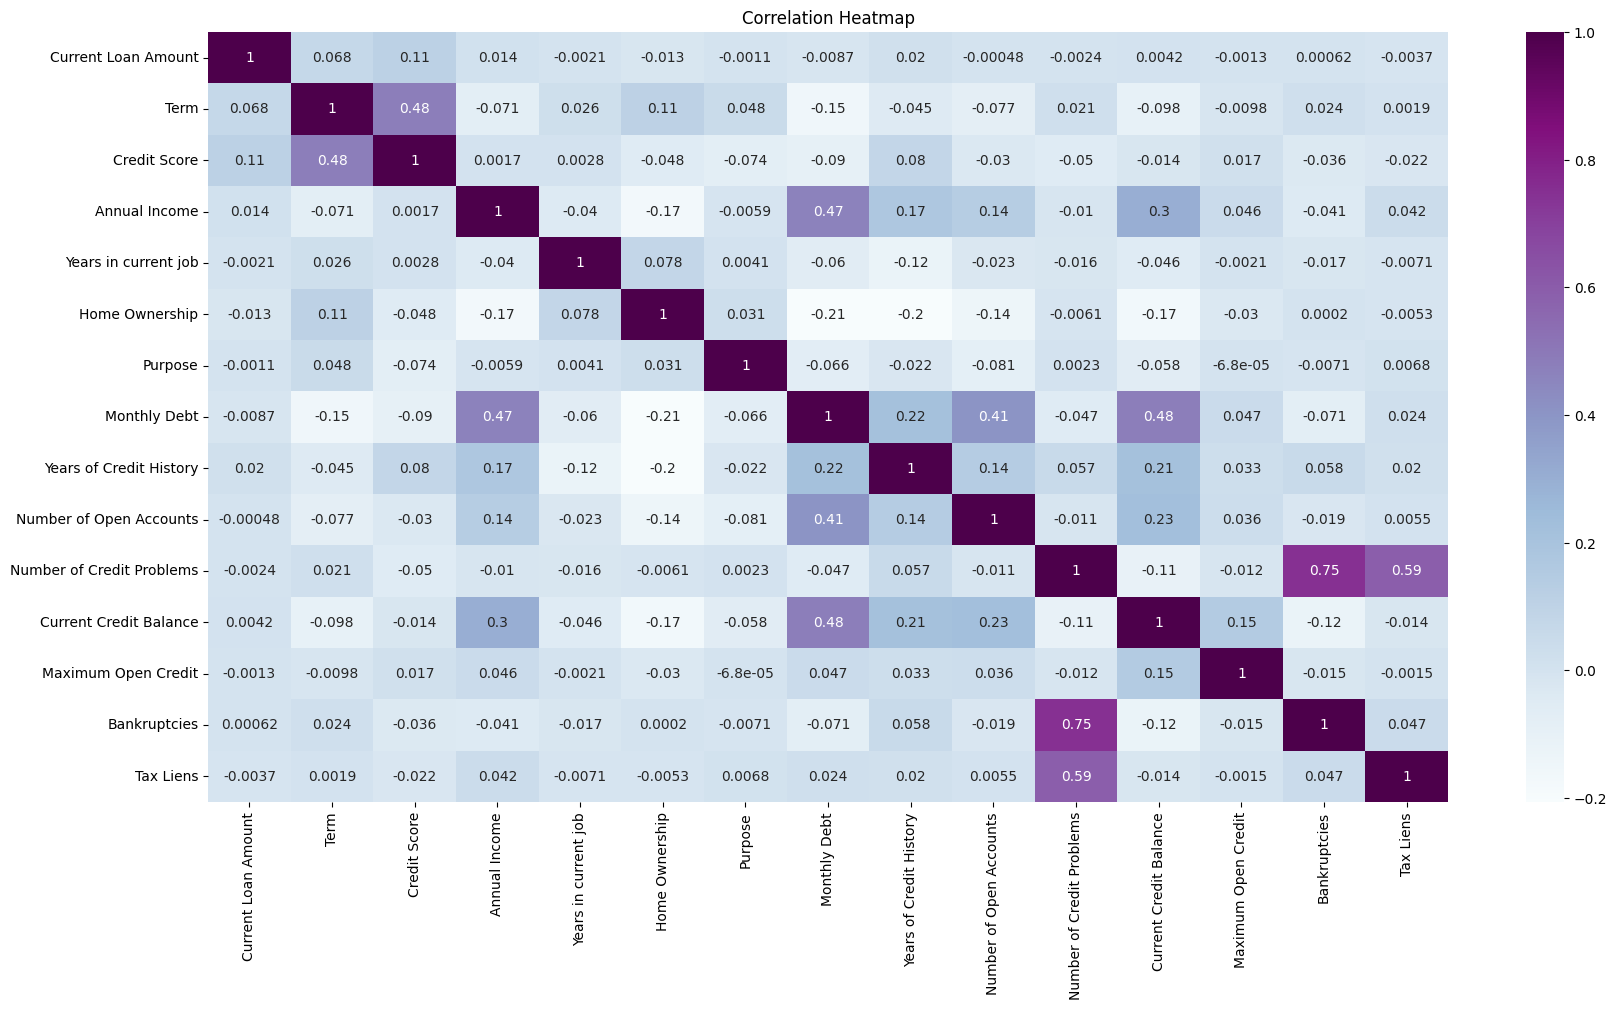

Top 5 Most Correlated Features with target_variable:
Annual Income              1.000000
Monthly Debt               0.466281
Current Credit Balance     0.298371
Years of Credit History    0.173001
Number of Open Accounts    0.135634
Maximum Open Credit        0.045682
Name: Annual Income, dtype: float64

Top 5 Least Correlated Features with target_variable:
Home Ownership              -0.169360
Term                        -0.071310
Bankruptcies                -0.041192
Years in current job        -0.039936
Number of Credit Problems   -0.010267
Name: Annual Income, dtype: float64


In [ ]:
# Plot the correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(dftrain2.corr(), annot=True, cmap="BuPu")
plt.title('Correlation Heatmap')
plt.show()

# Calculate correlations with the target variable
correlation_matrix = dftrain2.corr()
target_correlations = correlation_matrix['Annual Income']

# Get top 5 most and least correlated features with the target variable
top5_most_correlated = target_correlations.nlargest(6)  # include target_variable itself
top5_least_correlated = target_correlations.nsmallest(5)

# Print the results
print("Top 5 Most Correlated Features with target_variable:")
print(top5_most_correlated)

print("\nTop 5 Least Correlated Features with target_variable:")
print(top5_least_correlated)

Original missing values: 18301
KNN Imputation missing values: 0


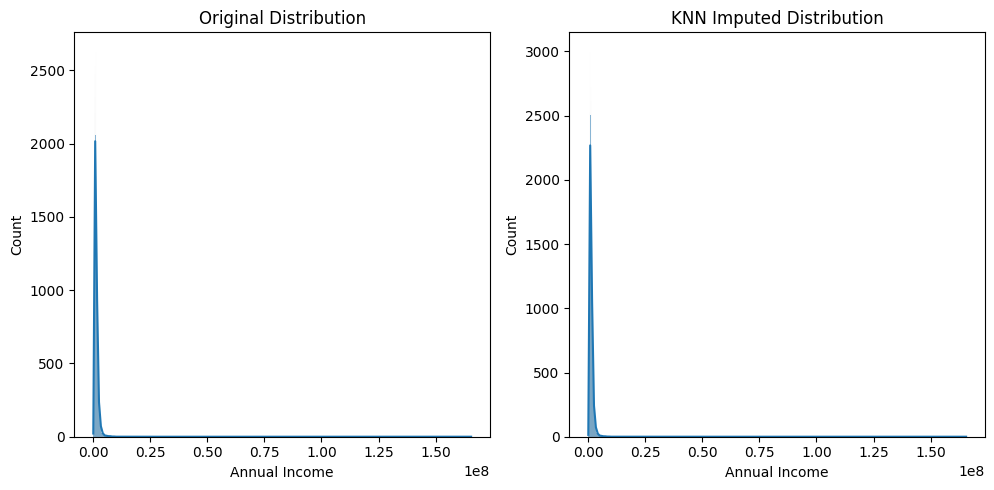


Original Statistics:
count    6.749000e+04
mean     1.396654e+06
std      1.118572e+06
min      7.662700e+04
25%      8.616405e+05
50%      1.198700e+06
75%      1.674774e+06
max      1.655574e+08
Name: Annual Income, dtype: float64

KNN Imputed Statistics:
count    8.579100e+04
mean     1.394105e+06
std      1.030959e+06
min      7.662700e+04
25%      8.971021e+05
50%      1.214788e+06
75%      1.653285e+06
max      1.655574e+08
Name: Annual Income, dtype: float64


In [ ]:
## KNN Imputation
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# สร้างตัวแปลง LabelEncoder
label_encoder = LabelEncoder()

# 1. KNN Imputation
def knn_imputation(df, target_column, n_neighbors=5):
    features = ['Monthly Debt', 'Current Credit Balance', 'Years of Credit History', 'Number of Open Accounts']
    imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = df.copy()
    df_imputed[features + [target_column]] = imputer.fit_transform(df[features + [target_column]])
    return df_imputed

# Apply imputation methods
df_knn_imputed = knn_imputation(dftrain, 'Annual Income')

# Compare results
print("Original missing values:", dftrain['Annual Income'].isnull().sum())
print("KNN Imputation missing values:", df_knn_imputed['Annual Income'].isnull().sum())
# print("MICE Imputation missing values:", df_mice_imputed['Annual Income'].isnull().sum())

# Visualize distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.histplot(dftrain['Annual Income'].dropna(), kde=True)
plt.title('Original Distribution')

plt.subplot(132)
sns.histplot(df_knn_imputed['Annual Income'], kde=True)
plt.title('KNN Imputed Distribution')

# plt.subplot(133)
# sns.histplot(df_mice_imputed['Annual Income'], kde=True)
# plt.title('MICE Imputed Distribution')

plt.tight_layout()
plt.show()

# Compare statistics
print("\nOriginal Statistics:")
print(dftrain['Annual Income'].describe())

print("\nKNN Imputed Statistics:")
print(df_knn_imputed['Annual Income'].describe())

# print("\nMICE Imputed Statistics:")
# print(df_mice_imputed['Annual Income'].describe())

In [ ]:
dftrain = df_knn_imputed

In [ ]:
check_null(dftrain)

                           Null Count  Percent Null
Loan Status                         0           0.0
Current Loan Amount                 0           0.0
Term                                0           0.0
Credit Score                        0           0.0
Annual Income                       0           0.0
Years in current job                0           0.0
Home Ownership                      0           0.0
Purpose                             0           0.0
Monthly Debt                        0           0.0
Years of Credit History             0           0.0
Number of Open Accounts             0           0.0
Number of Credit Problems           0           0.0
Current Credit Balance              0           0.0
Maximum Open Credit                 0           0.0
Bankruptcies                        0           0.0
Tax Liens                           0           0.0


# 2.3 Group data

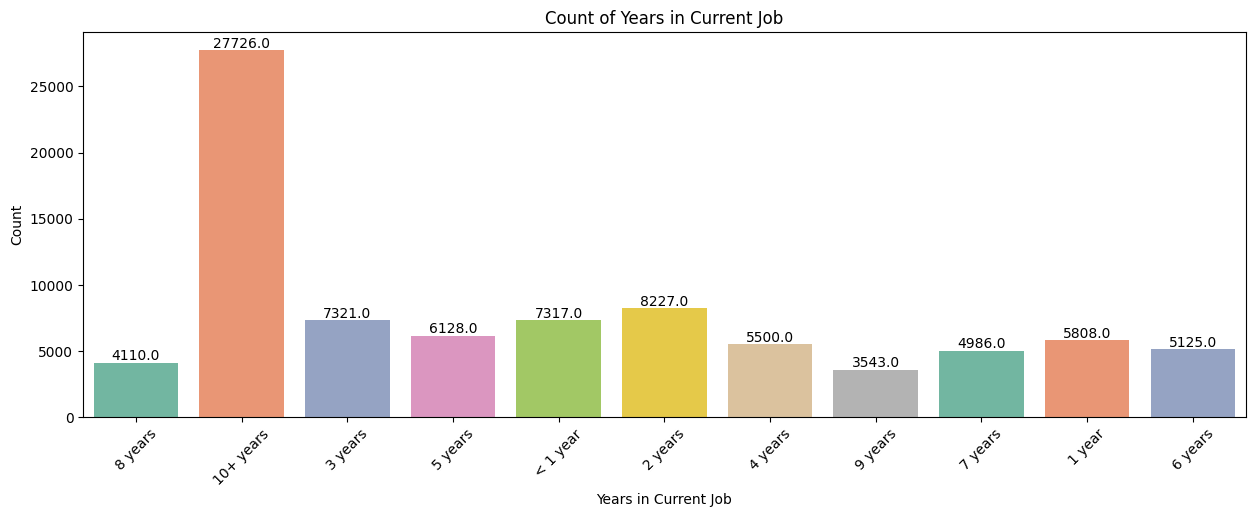

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x=dftrain["Years in current job"], palette="Set2")

# Adding the value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='bottom')

plt.title('Count of Years in Current Job')
plt.xlabel('Years in Current Job')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
# Convert Columns "Years in current job"
dftrain['Years in current job'] = dftrain['Years in current job'].apply(
    lambda x: '>10 years' if x in ['10+ years'] else
              '7-9 years' if x in ['7 years', '8 years', '9 years'] else
              '4-6 years' if x in ['4 years', '5 years', '6 years'] else
              '0-1 year' if x in ['< 1 year', '1 year'] else
              '2-3 years' if x in ['2 years', '3 years'] else None
)

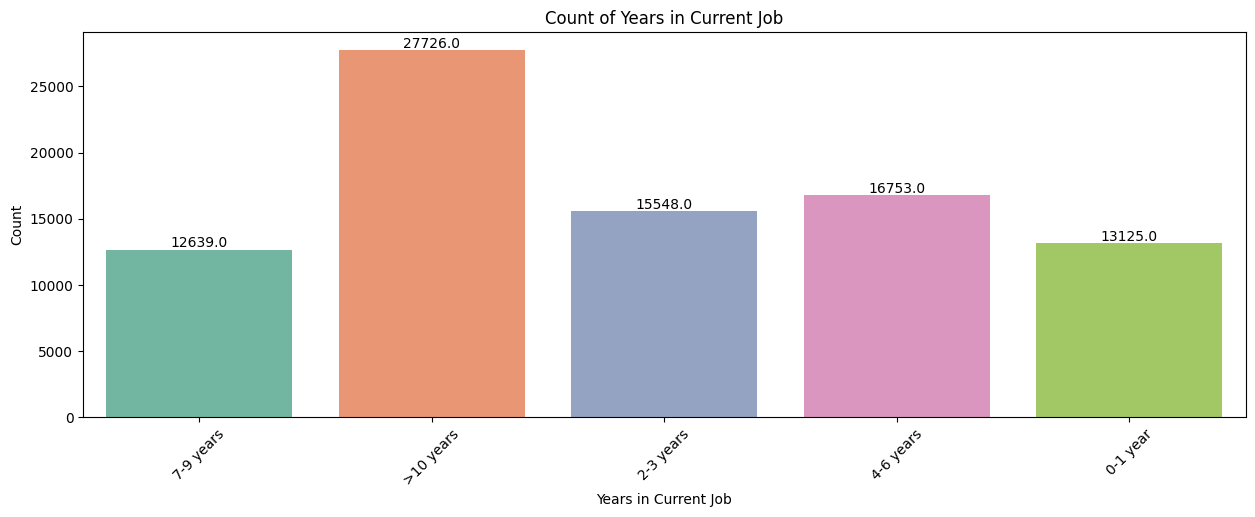

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x=dftrain["Years in current job"], palette="Set2")

# Adding the value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='bottom')

plt.title('Count of Years in Current Job')
plt.xlabel('Years in Current Job')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
dftrain

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.000000,1167493.0,7-9 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,726.909076,1446804.4,>10 years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.000000,2231892.0,7-9 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.000000,806949.0,2-3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,726.909076,1496956.8,4-6 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85786,Fully Paid,48796.0,Short Term,726.909076,912794.2,4-6 years,Home Mortgage,major_purchase,8298.63,8.3,9.0,0.0,87875.0,239404.0,0.0,0.0
85787,Fully Paid,210584.0,Short Term,719.000000,783389.0,0-1 year,Home Mortgage,Other,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
85788,Fully Paid,99999999.0,Short Term,732.000000,1289416.0,0-1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
85789,Fully Paid,103136.0,Short Term,742.000000,1150545.0,4-6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


# 2.4 Encoding the object Dataset

In [ ]:
le = LabelEncoder()
cols = ['Loan Status','Term','Years in current job','Purpose','Home Ownership']
dftrain[cols] = dftrain[cols].apply(LabelEncoder().fit_transform)
dftrain

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,1,709.000000,1167493.0,3,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,1,726.909076,1446804.4,4,1,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,1,741.000000,2231892.0,3,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,0,721.000000,806949.0,1,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,1,726.909076,1496956.8,2,3,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85786,1,48796.0,1,726.909076,912794.2,2,1,9,8298.63,8.3,9.0,0.0,87875.0,239404.0,0.0,0.0
85787,1,210584.0,1,719.000000,783389.0,0,1,7,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
85788,1,99999999.0,1,732.000000,1289416.0,0,3,3,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
85789,1,103136.0,1,742.000000,1150545.0,2,3,3,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


## 3. Select Feature

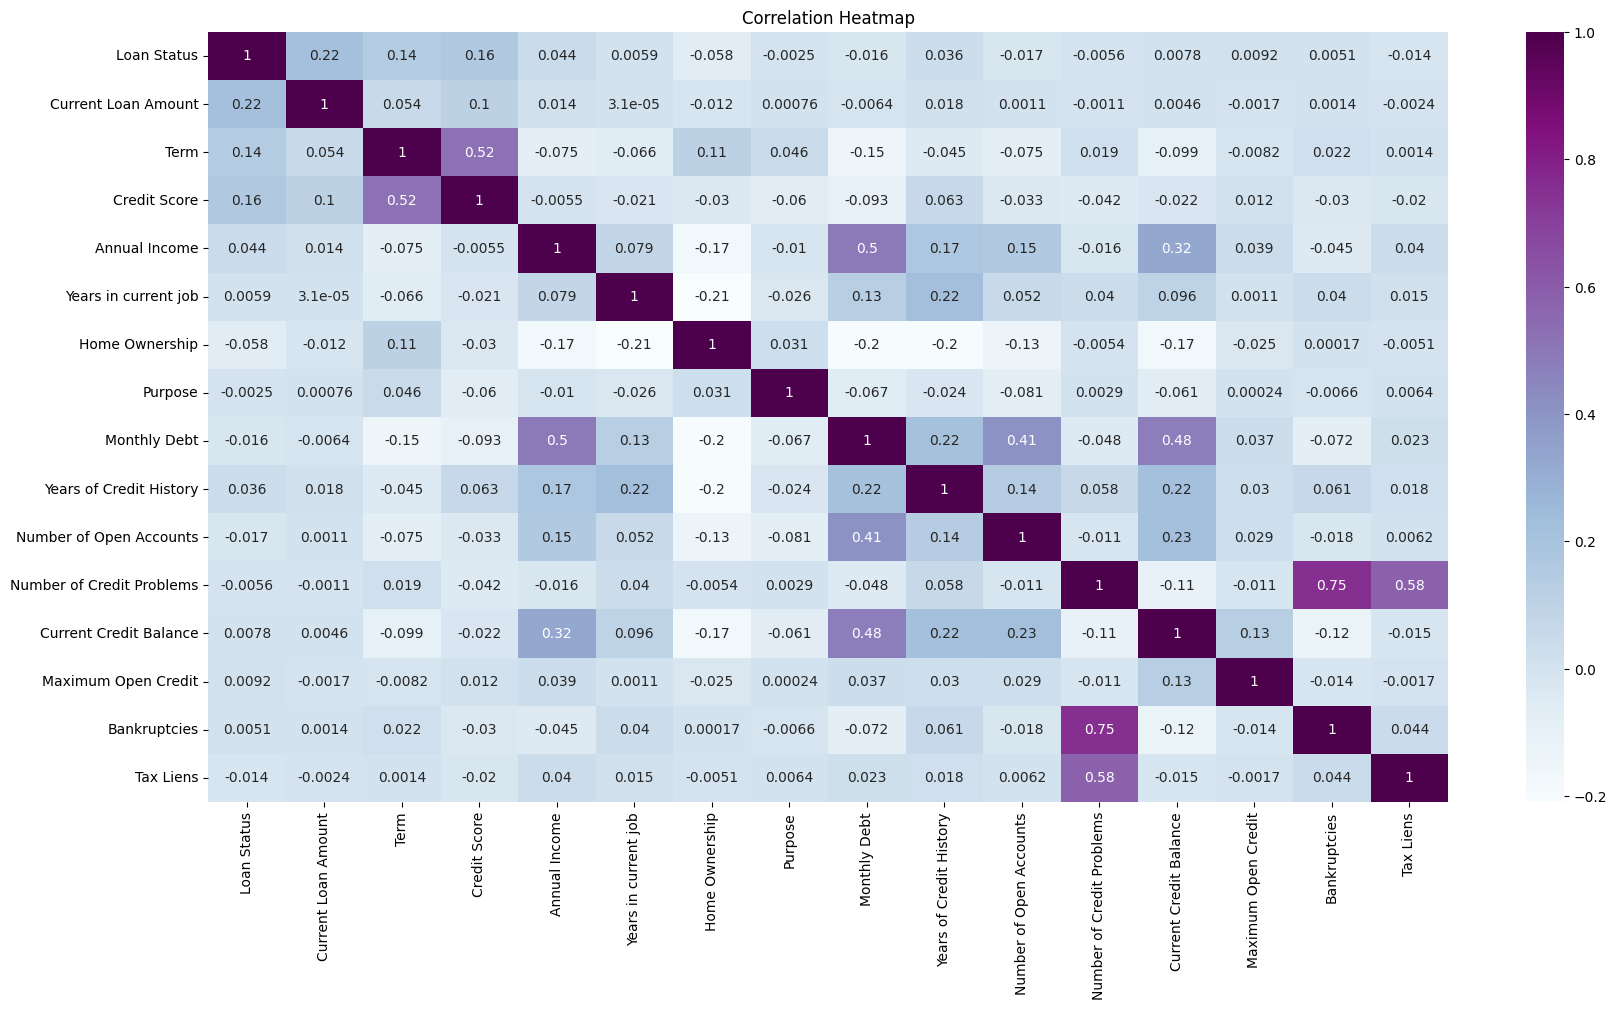

Top 5 Most Correlated Features with target_variable:
Loan Status                1.000000
Current Loan Amount        0.220545
Credit Score               0.163087
Term                       0.143948
Annual Income              0.043524
Years of Credit History    0.036228
Name: Loan Status, dtype: float64

Top 5 Least Correlated Features with target_variable:
Home Ownership              -0.058101
Number of Open Accounts     -0.017014
Monthly Debt                -0.015616
Tax Liens                   -0.014303
Number of Credit Problems   -0.005623
Name: Loan Status, dtype: float64


In [ ]:
##dftrain.drop(columns = ["Loan ID"], inplace = True)
##dftrain.drop(columns = ["Customer ID"], inplace = True)
# Assuming dftrain is your DataFrame and 'target_variable' is the column you're interested in
plt.figure(figsize=(20, 10))
sns.heatmap(dftrain.corr(), annot=True, cmap="BuPu")
plt.title('Correlation Heatmap')
plt.show()

# Calculate correlations with the target variable
correlation_matrix = dftrain.corr()
target_correlations = correlation_matrix['Loan Status']

# Get top 5 most and least correlated features with the target variable
top5_most_correlated = target_correlations.nlargest(6)  # include target_variable itself
top5_least_correlated = target_correlations.nsmallest(5)

# Print the results
print("Top 5 Most Correlated Features with target_variable:")
print(top5_most_correlated)

print("\nTop 5 Least Correlated Features with target_variable:")
print(top5_least_correlated)

Current Loan Amount (0.220545): มีความสัมพันธ์บวกที่ดีกับ Loan Status ควรใช้ฟีเจอร์นี้ในโมเดล
Credit Score (0.163087): มีความสัมพันธ์บวก ควรใช้ในโมเดล
Term (0.143948): มีความสัมพันธ์บวก สามารถใช้ในโมเดลได้
Annual Income (0.043525): มีความสัมพันธ์บวก แต่น้อยกว่า 0.05 อาจจะพิจารณาได้ว่าควรใช้อยู่ แต่มีผลกระทบที่น้อย

## 4. Create Model & Evaluation

In [ ]:
dftrain

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,1,709.000000,1167493.0,3,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,1,726.909076,1446804.4,4,1,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,1,741.000000,2231892.0,3,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,0,721.000000,806949.0,1,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,1,726.909076,1496956.8,2,3,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85786,1,48796.0,1,726.909076,912794.2,2,1,9,8298.63,8.3,9.0,0.0,87875.0,239404.0,0.0,0.0
85787,1,210584.0,1,719.000000,783389.0,0,1,7,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
85788,1,99999999.0,1,732.000000,1289416.0,0,3,3,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
85789,1,103136.0,1,742.000000,1150545.0,2,3,3,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


(60053, 15)
(25738, 15)
Model: Logistic Regression With class_weight
Method: No Handling
Class distribution: Counter({1: 45216, 0: 14837})
              precision    recall  f1-score   support

           0       0.35      0.72      0.47      6478
           1       0.85      0.54      0.66     19260

    accuracy                           0.59     25738
   macro avg       0.60      0.63      0.57     25738
weighted avg       0.72      0.59      0.61     25738

[[ 4660  1818]
 [ 8797 10463]]
Precision: 0.8519664522433027
Recall: 0.5432502596053997
F1-score: 0.6634539171237437
Accuracy: 0.5875747921361412




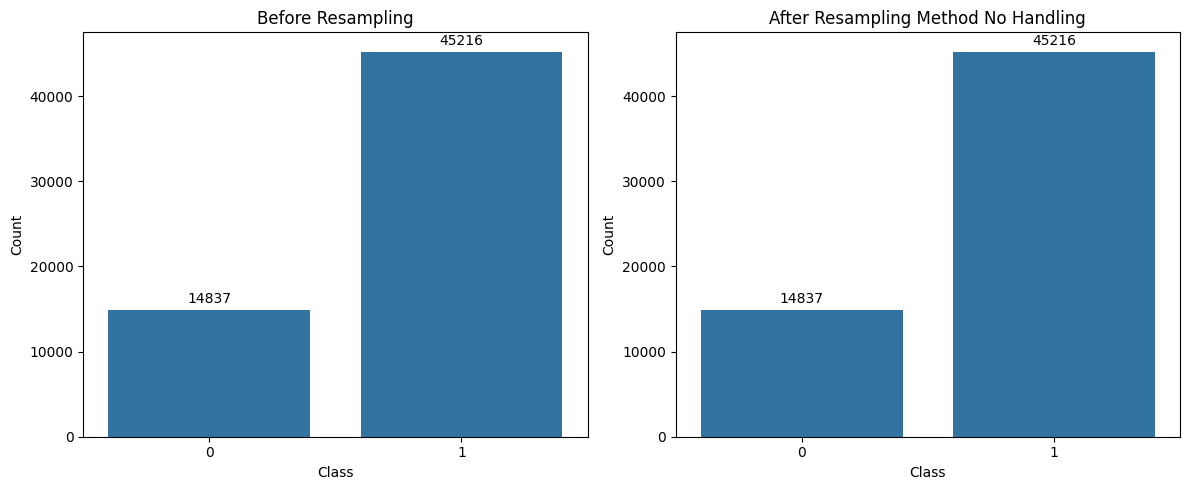

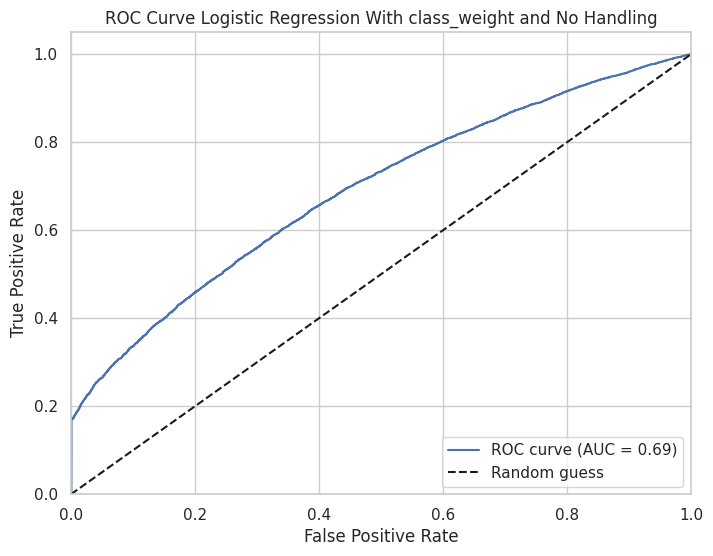

<Figure size 640x480 with 0 Axes>

Method: Random Oversampling
Class distribution: Counter({1: 45216, 0: 45216})
              precision    recall  f1-score   support

           0       0.35      0.72      0.47      6478
           1       0.85      0.54      0.66     19260

    accuracy                           0.59     25738
   macro avg       0.60      0.63      0.56     25738
weighted avg       0.72      0.59      0.61     25738

[[ 4660  1818]
 [ 8836 10424]]
Precision: 0.8514948537820618
Recall: 0.5412253374870197
F1-score: 0.6617992508412164
Accuracy: 0.586059522884451




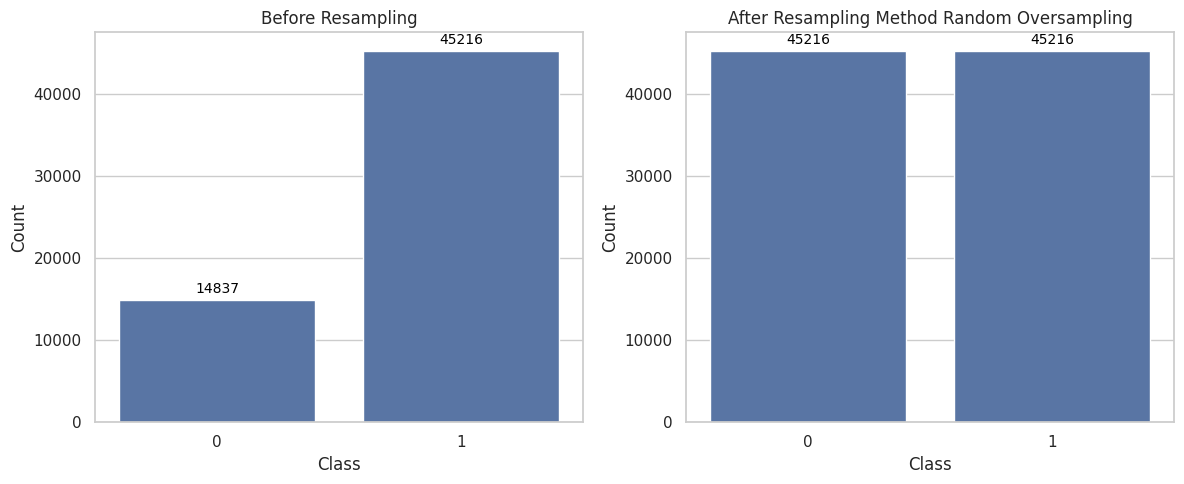

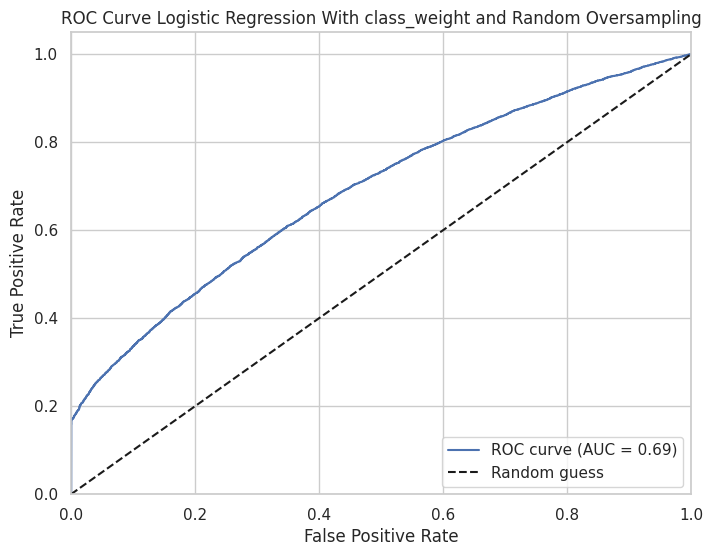

<Figure size 640x480 with 0 Axes>

Method: SMOTE
Class distribution: Counter({1: 45216, 0: 45216})
              precision    recall  f1-score   support

           0       0.35      0.72      0.47      6478
           1       0.85      0.55      0.67     19260

    accuracy                           0.59     25738
   macro avg       0.60      0.63      0.57     25738
weighted avg       0.72      0.59      0.62     25738

[[ 4653  1825]
 [ 8752 10508]]
Precision: 0.852023027649396
Recall: 0.5455867082035306
F1-score: 0.6652106479283385
Accuracy: 0.5890512083300956




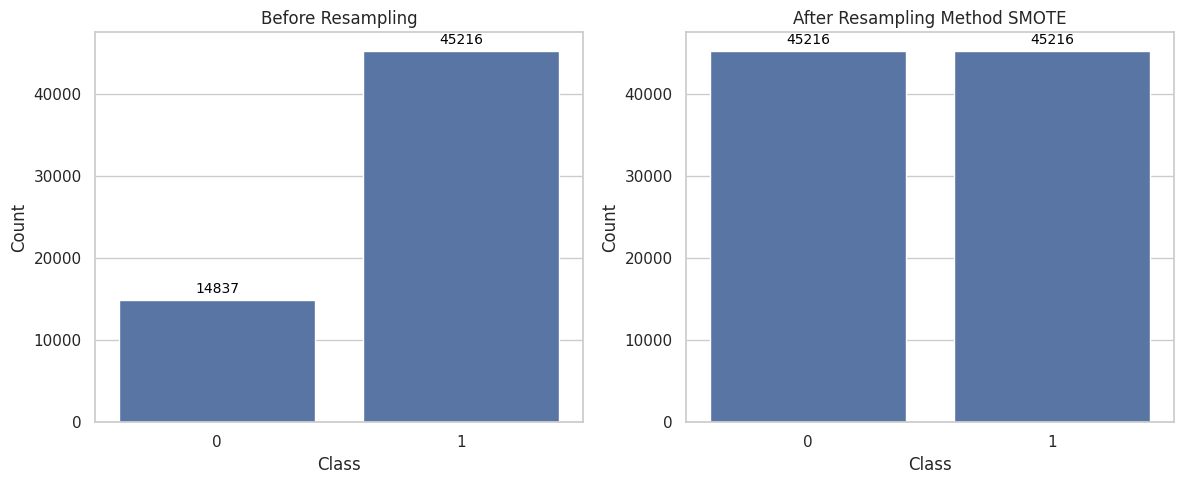

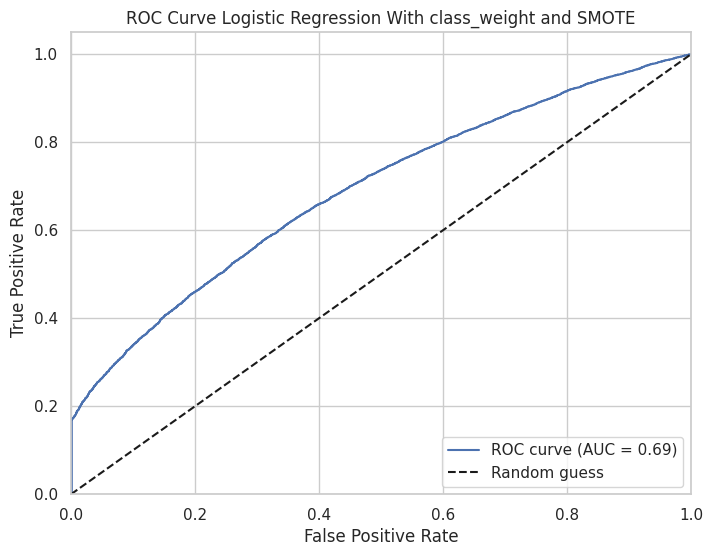

<Figure size 640x480 with 0 Axes>

Method: Random Undersampling
Class distribution: Counter({0: 14837, 1: 14837})
              precision    recall  f1-score   support

           0       0.35      0.72      0.47      6478
           1       0.85      0.55      0.67     19260

    accuracy                           0.59     25738
   macro avg       0.60      0.63      0.57     25738
weighted avg       0.73      0.59      0.62     25738

[[ 4664  1814]
 [ 8761 10499]]
Precision: 0.8526760334605701
Recall: 0.5451194184839044
F1-score: 0.6650619199949324
Accuracy: 0.5891289144455669




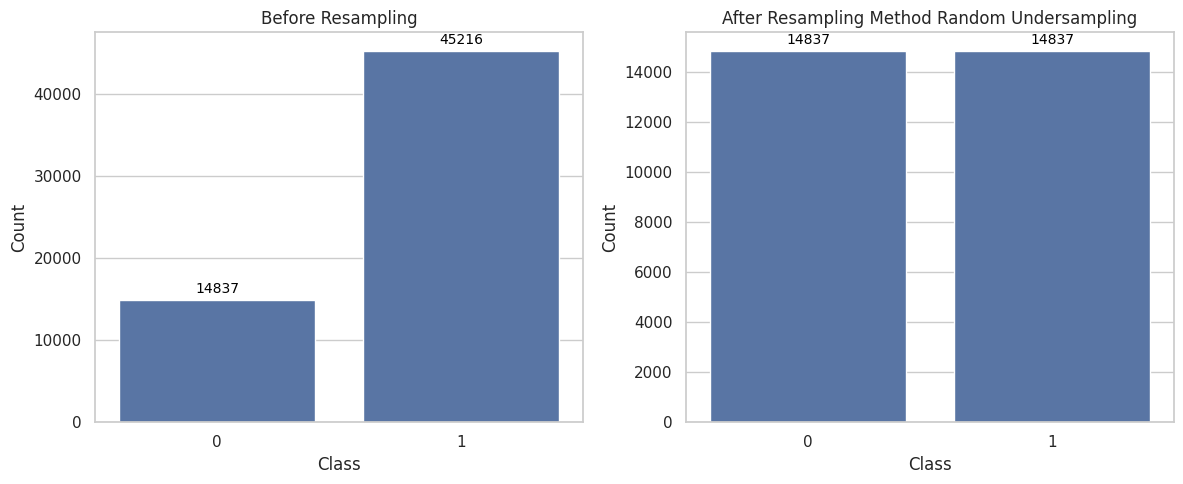

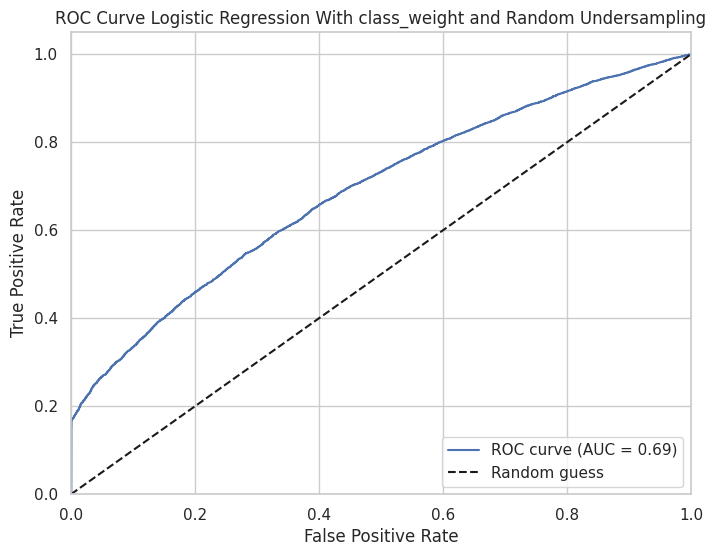

<Figure size 640x480 with 0 Axes>

Method: SMOTEENN
Class distribution: Counter({1: 44768, 0: 44768})
              precision    recall  f1-score   support

           0       0.35      0.72      0.47      6478
           1       0.85      0.54      0.66     19260

    accuracy                           0.59     25738
   macro avg       0.60      0.63      0.57     25738
weighted avg       0.73      0.59      0.61     25738

[[ 4664  1814]
 [ 8779 10481]]
Precision: 0.8524603497356649
Recall: 0.5441848390446521
F1-score: 0.6643004278244335
Accuracy: 0.5884295594063252




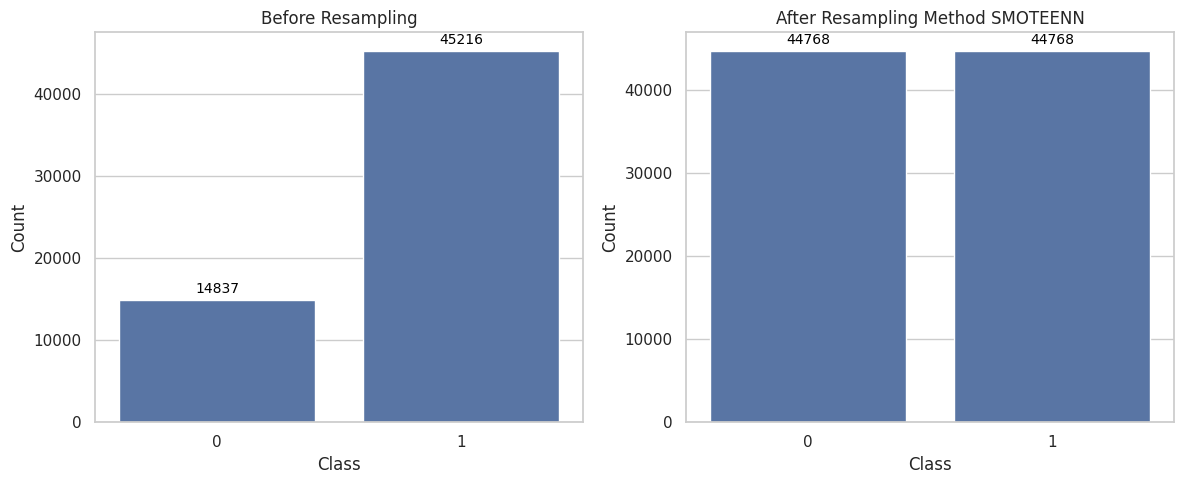

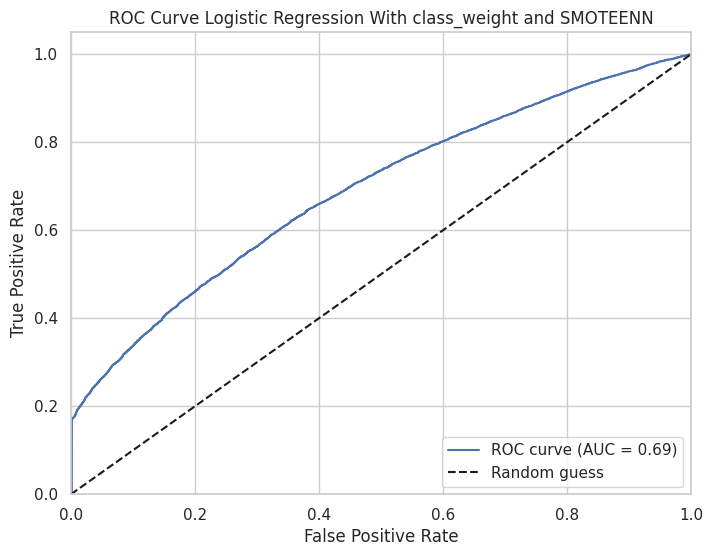

<Figure size 640x480 with 0 Axes>

_______________________________________________________
Model: Decision Tree With class_weight
Method: No Handling
Class distribution: Counter({1: 45216, 0: 14837})
              precision    recall  f1-score   support

           0       0.33      0.32      0.32      6478
           1       0.77      0.78      0.78     19260

    accuracy                           0.67     25738
   macro avg       0.55      0.55      0.55     25738
weighted avg       0.66      0.67      0.66     25738

[[ 2044  4434]
 [ 4179 15081]]
Precision: 0.7727901614142967
Recall: 0.7830218068535826
F1-score: 0.7778723404255319
Accuracy: 0.6653586137229




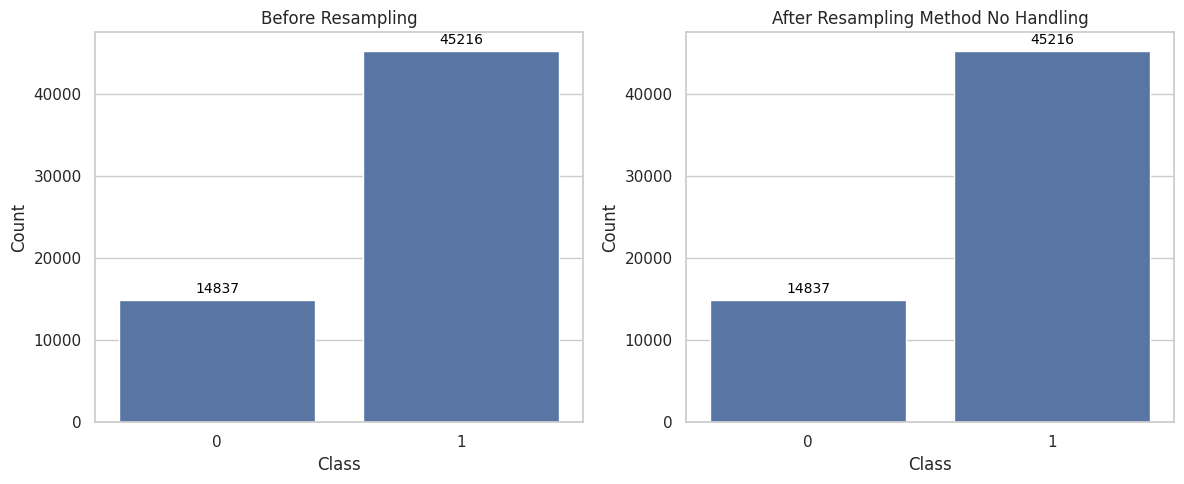

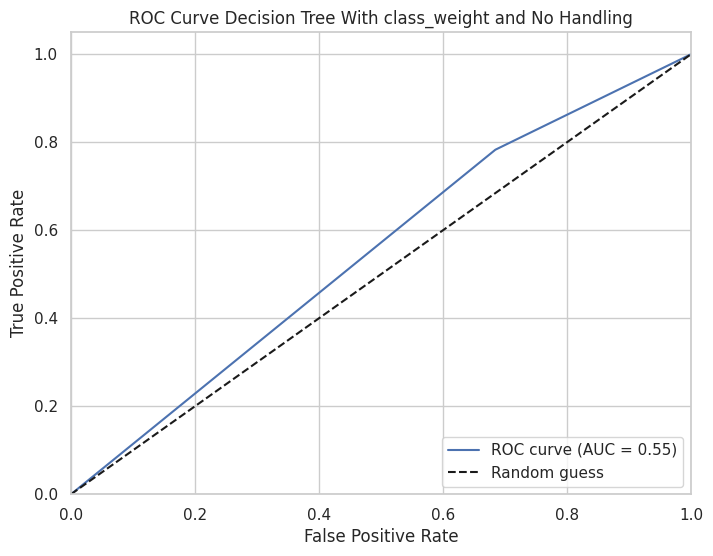

<Figure size 640x480 with 0 Axes>

Method: Random Oversampling
Class distribution: Counter({1: 45216, 0: 45216})
              precision    recall  f1-score   support

           0       0.33      0.32      0.33      6478
           1       0.77      0.78      0.78     19260

    accuracy                           0.66     25738
   macro avg       0.55      0.55      0.55     25738
weighted avg       0.66      0.66      0.66     25738

[[ 2093  4385]
 [ 4281 14979]]
Precision: 0.7735488535426565
Recall: 0.7777258566978194
F1-score: 0.7756317315658657
Accuracy: 0.6632994016629109




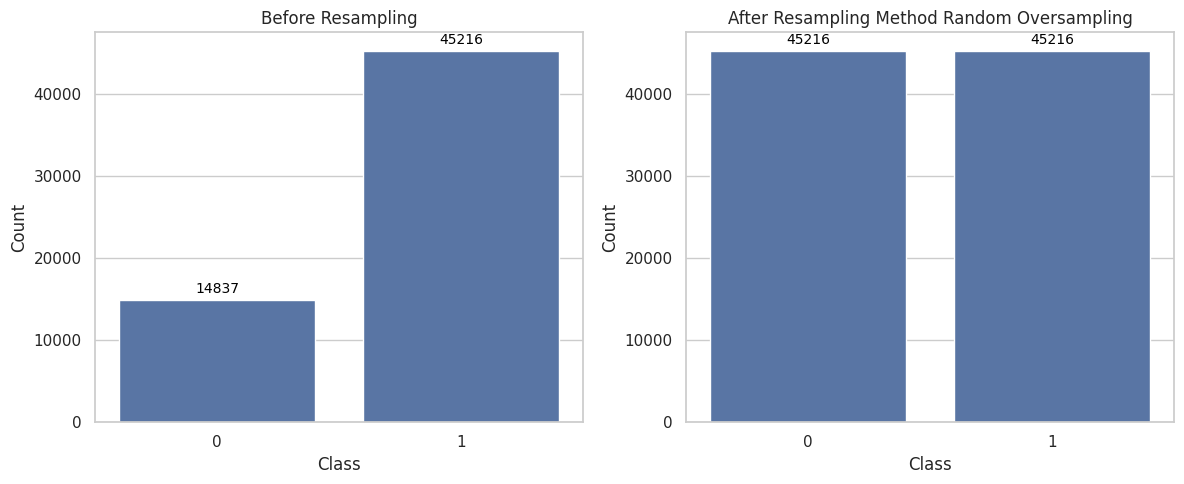

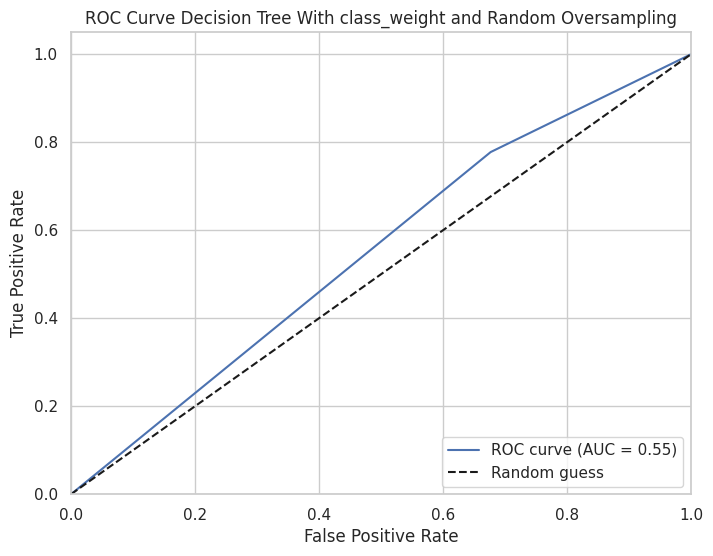

<Figure size 640x480 with 0 Axes>

Method: SMOTE
Class distribution: Counter({1: 45216, 0: 45216})
              precision    recall  f1-score   support

           0       0.34      0.37      0.35      6478
           1       0.78      0.75      0.77     19260

    accuracy                           0.66     25738
   macro avg       0.56      0.56      0.56     25738
weighted avg       0.67      0.66      0.66     25738

[[ 2414  4064]
 [ 4752 14508]]
Precision: 0.781175963816498
Recall: 0.7532710280373832
F1-score: 0.7669697610488475
Accuracy: 0.6574714430025643




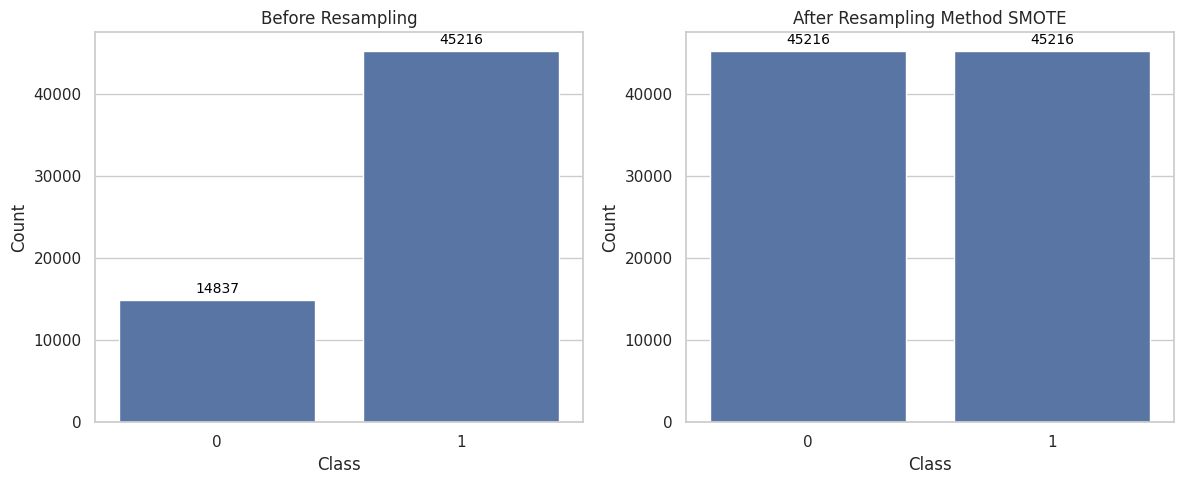

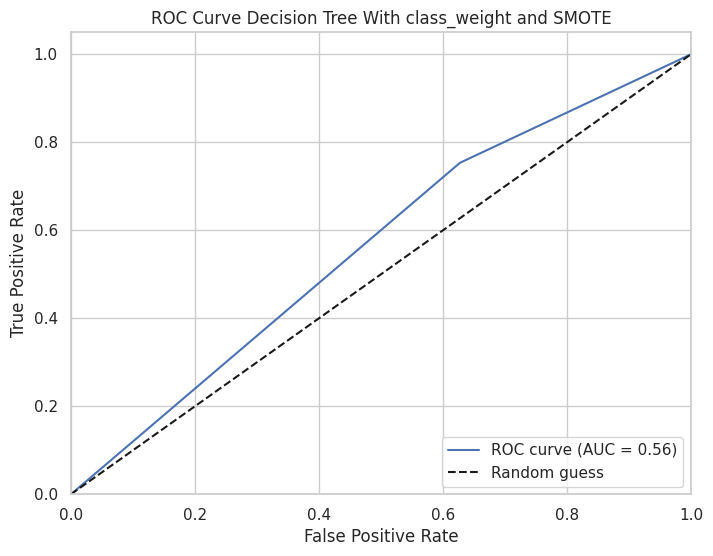

<Figure size 640x480 with 0 Axes>

Method: Random Undersampling
Class distribution: Counter({0: 14837, 1: 14837})
              precision    recall  f1-score   support

           0       0.31      0.57      0.40      6478
           1       0.80      0.58      0.67     19260

    accuracy                           0.58     25738
   macro avg       0.56      0.58      0.54     25738
weighted avg       0.68      0.58      0.60     25738

[[ 3700  2778]
 [ 8101 11159]]
Precision: 0.8006744636578891
Recall: 0.5793873312564901
F1-score: 0.6722896647287405
Accuracy: 0.5773175848939311




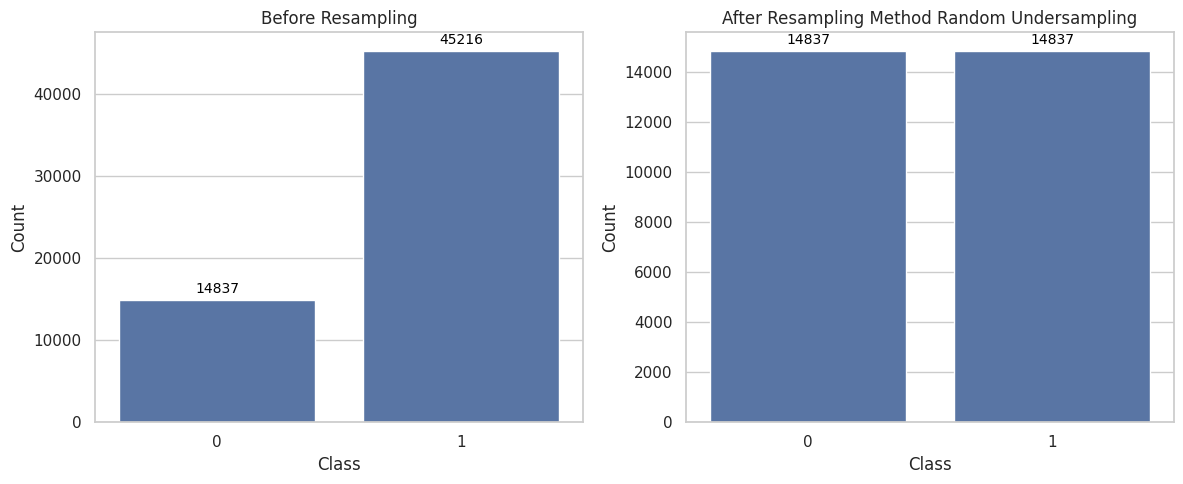

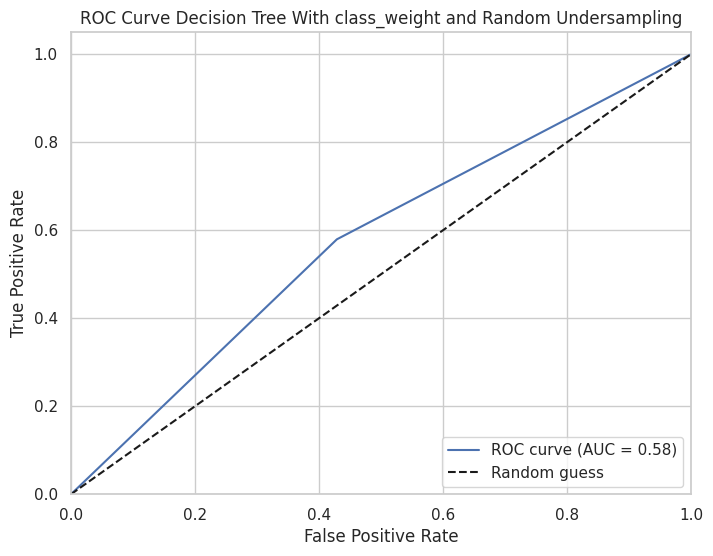

<Figure size 640x480 with 0 Axes>

Method: SMOTEENN
Class distribution: Counter({1: 44768, 0: 44768})
              precision    recall  f1-score   support

           0       0.33      0.37      0.35      6478
           1       0.78      0.75      0.77     19260

    accuracy                           0.66     25738
   macro avg       0.56      0.56      0.56     25738
weighted avg       0.67      0.66      0.66     25738

[[ 2388  4090]
 [ 4771 14489]]
Precision: 0.7798589805694601
Recall: 0.7522845275181724
F1-score: 0.7658236211316367
Accuracy: 0.6557230554044603




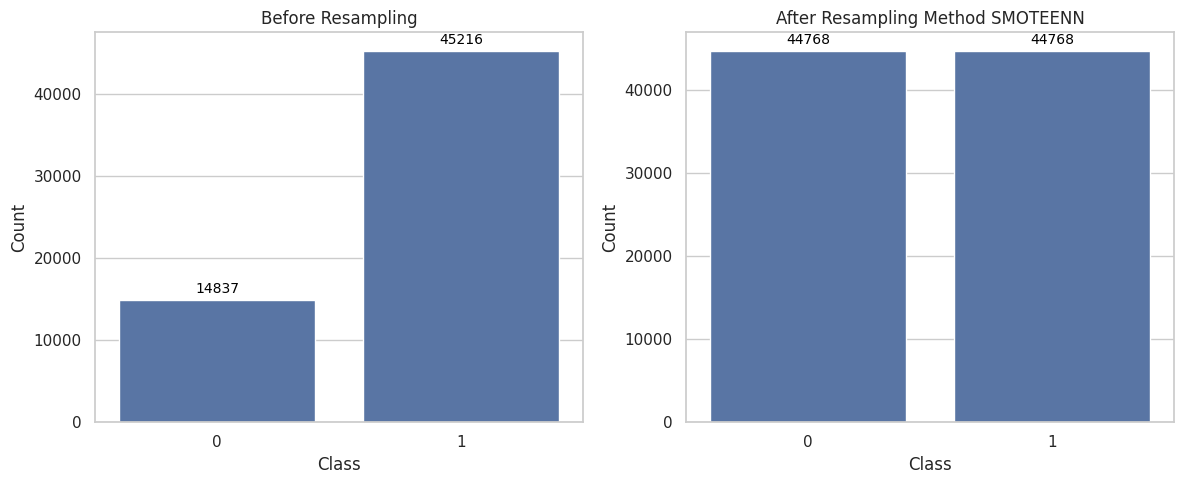

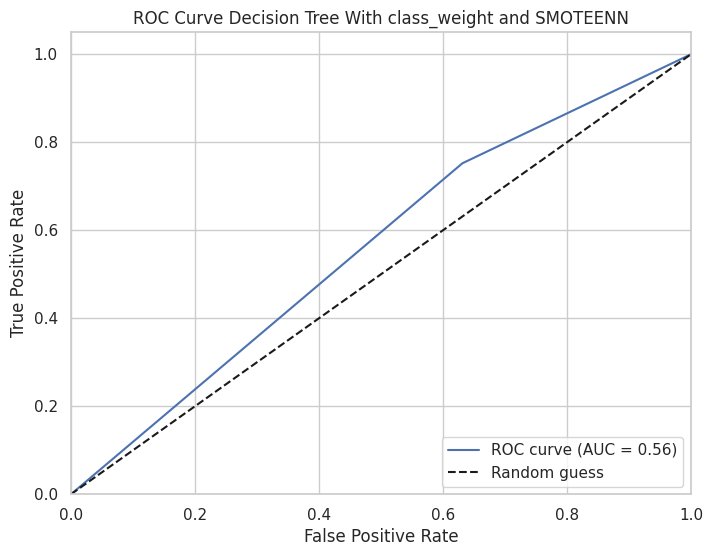

<Figure size 640x480 with 0 Axes>

_______________________________________________________
Model: Random Forest With class_weight
Method: No Handling
Class distribution: Counter({1: 45216, 0: 14837})
              precision    recall  f1-score   support

           0       0.48      0.07      0.13      6478
           1       0.76      0.97      0.85     19260

    accuracy                           0.75     25738
   macro avg       0.62      0.52      0.49     25738
weighted avg       0.69      0.75      0.67     25738

[[  470  6008]
 [  510 18750]]
Precision: 0.7573309637288957
Recall: 0.9735202492211839
F1-score: 0.8519242128220273
Accuracy: 0.7467557696790738




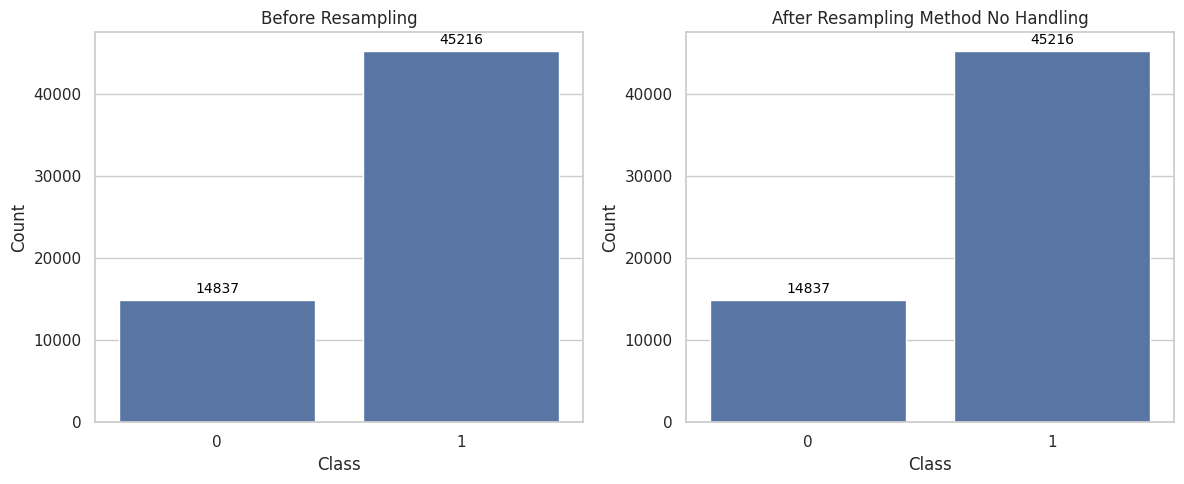

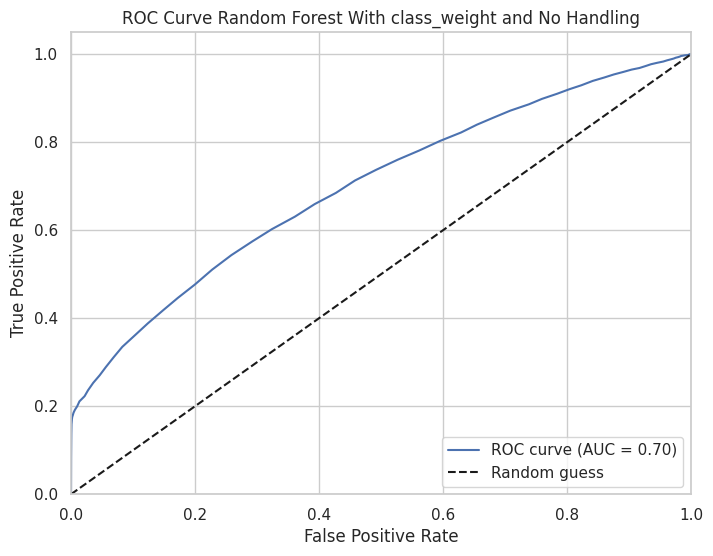

<Figure size 640x480 with 0 Axes>

Method: Random Oversampling
Class distribution: Counter({1: 45216, 0: 45216})
              precision    recall  f1-score   support

           0       0.46      0.22      0.30      6478
           1       0.78      0.91      0.84     19260

    accuracy                           0.74     25738
   macro avg       0.62      0.57      0.57     25738
weighted avg       0.70      0.74      0.70     25738

[[ 1428  5050]
 [ 1689 17571]]
Precision: 0.7767561115777375
Recall: 0.9123052959501557
F1-score: 0.8390917122322772
Accuracy: 0.7381692439194965




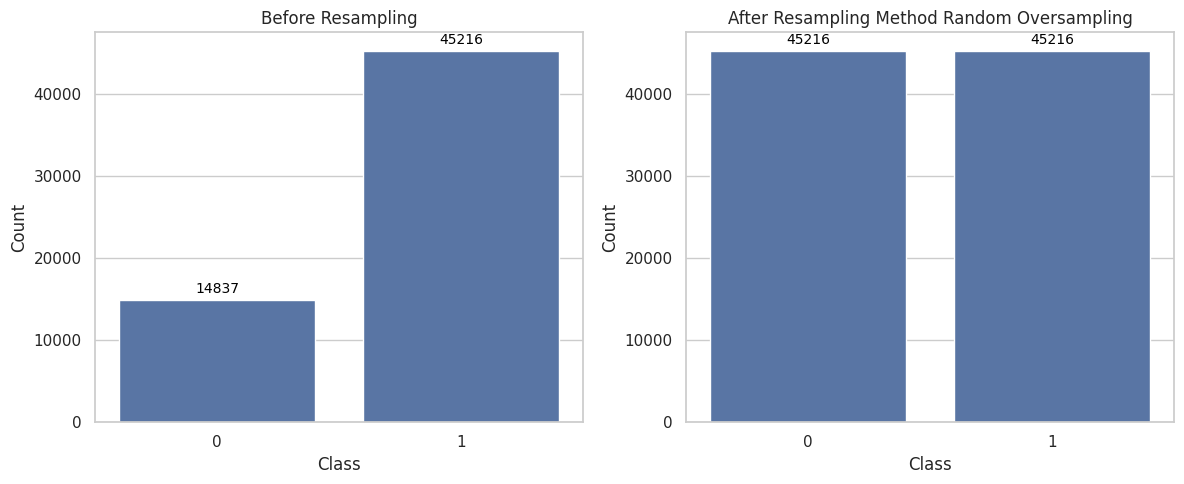

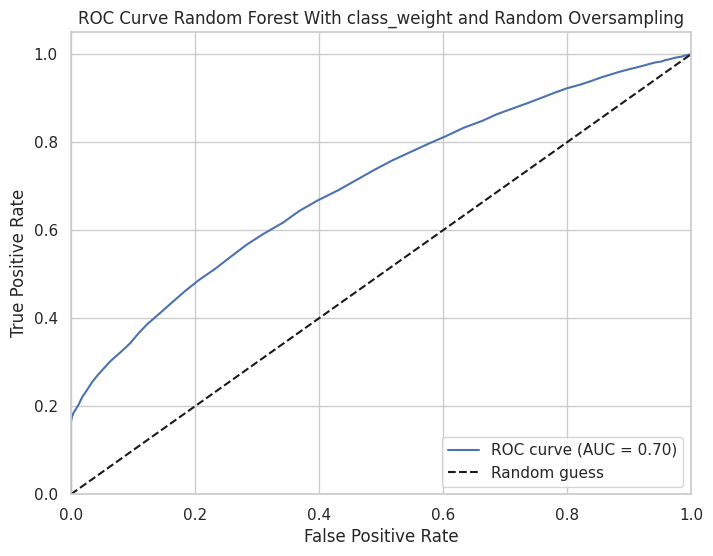

<Figure size 640x480 with 0 Axes>

Method: SMOTE
Class distribution: Counter({1: 45216, 0: 45216})
              precision    recall  f1-score   support

           0       0.42      0.33      0.37      6478
           1       0.79      0.85      0.82     19260

    accuracy                           0.72     25738
   macro avg       0.61      0.59      0.59     25738
weighted avg       0.70      0.72      0.70     25738

[[ 2140  4338]
 [ 2944 16316]]
Precision: 0.789968044930764
Recall: 0.8471443406022845
F1-score: 0.8175577491606955
Accuracy: 0.7170720335690419




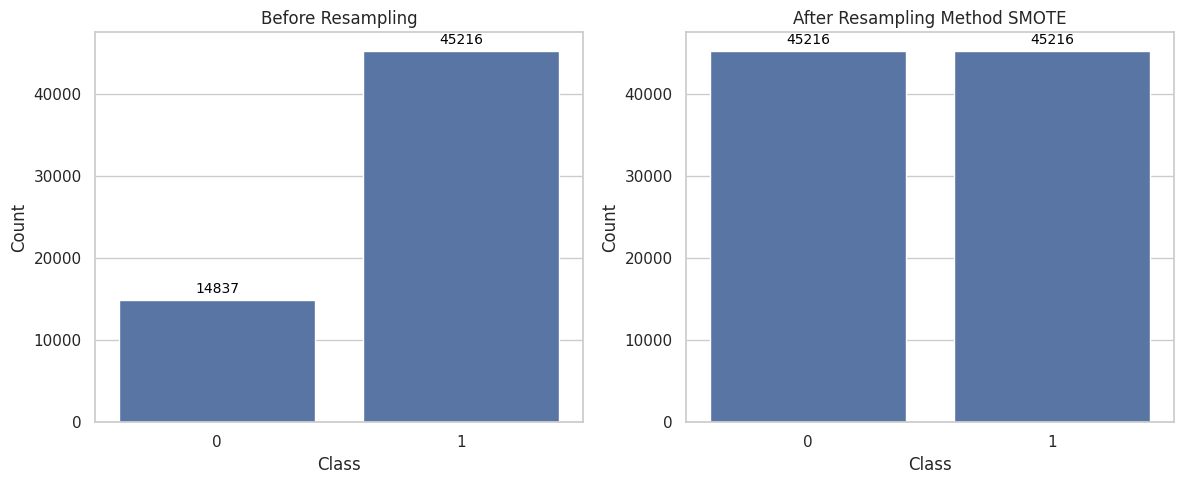

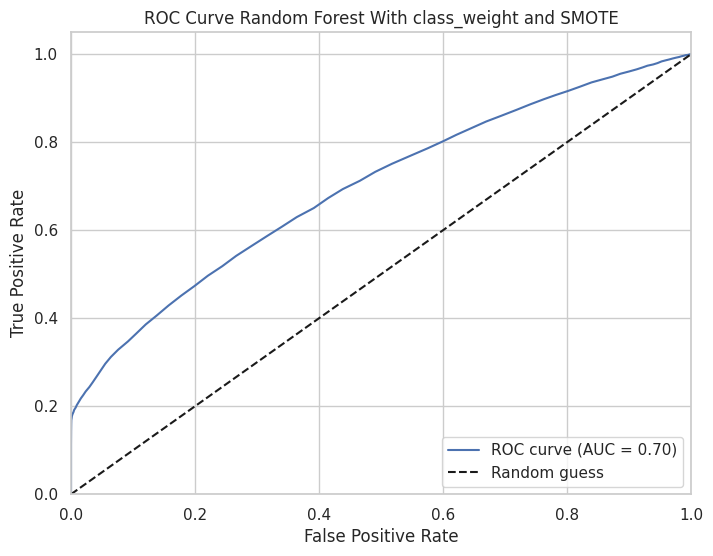

<Figure size 640x480 with 0 Axes>

Method: Random Undersampling
Class distribution: Counter({0: 14837, 1: 14837})
              precision    recall  f1-score   support

           0       0.35      0.72      0.47      6478
           1       0.86      0.56      0.67     19260

    accuracy                           0.60     25738
   macro avg       0.60      0.64      0.57     25738
weighted avg       0.73      0.60      0.62     25738

[[ 4663  1815]
 [ 8536 10724]]
Precision: 0.8552516149613206
Recall: 0.5568016614745587
F1-score: 0.6744866190760715
Accuracy: 0.5978319993783511




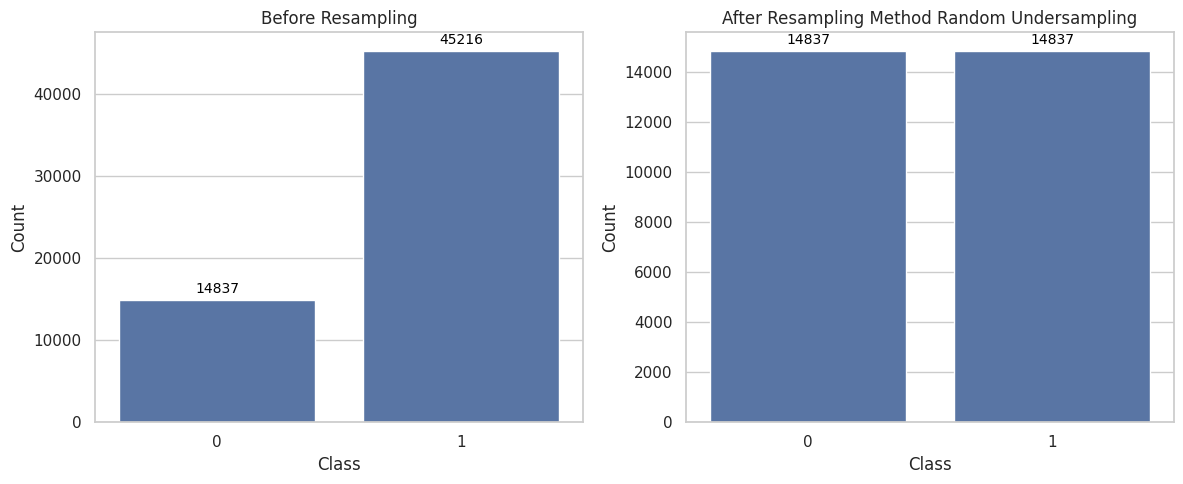

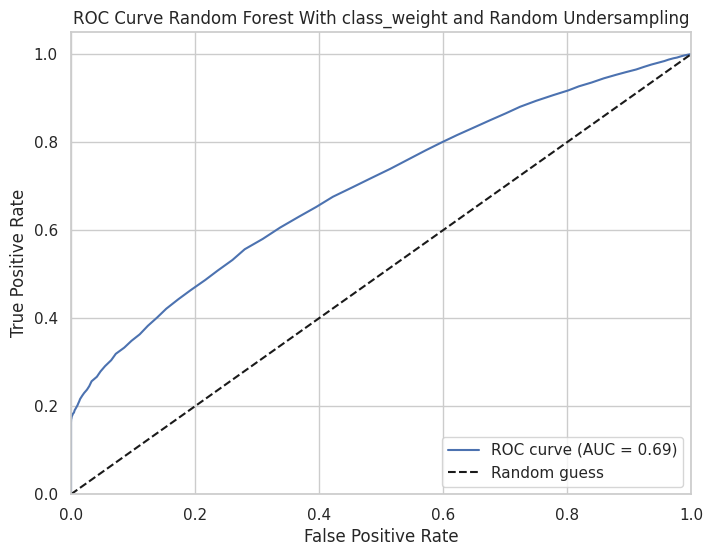

<Figure size 640x480 with 0 Axes>

Method: SMOTEENN
Class distribution: Counter({1: 44768, 0: 44768})
              precision    recall  f1-score   support

           0       0.42      0.32      0.36      6478
           1       0.79      0.85      0.82     19260

    accuracy                           0.72     25738
   macro avg       0.60      0.59      0.59     25738
weighted avg       0.70      0.72      0.70     25738

[[ 2075  4403]
 [ 2871 16389]]
Precision: 0.7882358599461331
Recall: 0.8509345794392523
F1-score: 0.8183860980725057
Accuracy: 0.717382858030927




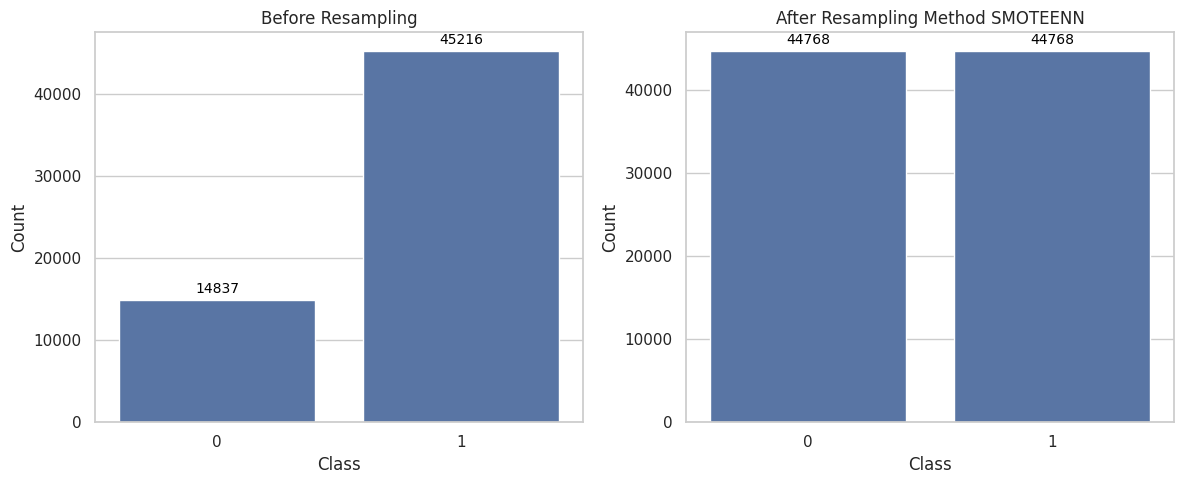

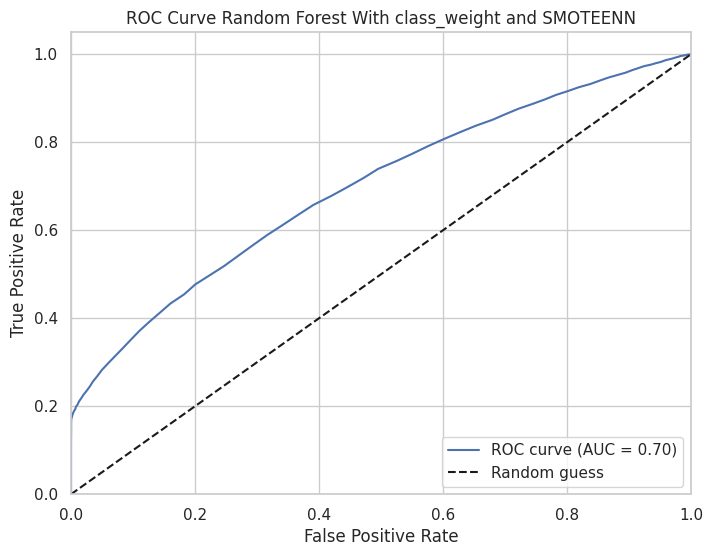

<Figure size 640x480 with 0 Axes>

_______________________________________________________


,model,method,precision_class_0,precision_class_1,recall_class_0,recall_class_1,f1_class_0,f1_class_1,accuracy,auc_score
0,Logistic Regression With class_weight,No Handling,0.346288,0.851966,0.719358,0.543250,0.467519,0.663454,0.587575,0.688866
1,Logistic Regression With class_weight,Random Oversampling,0.345287,0.851495,0.719358,0.541225,0.466607,0.661799,0.586060,0.688287
2,Logistic Regression With class_weight,SMOTE,0.347109,0.852023,0.718277,0.545587,0.468038,0.665211,0.589051,0.689455
3,Logistic Regression With class_weight,Random Undersampling,0.347412,0.852676,0.719975,0.545119,0.468673,0.665062,0.589129,0.688563
4,Logistic Regression With class_weight,SMOTEENN,0.346946,0.852460,0.719975,0.544185,0.468250,0.664300,0.588430,0.689634
5,Decision Tree With class_weight,No Handling,0.328459,0.772790,0.315529,0.783022,0.321864,0.777872,0.665359,0.549276
6,Decision Tree With class_weight,Random Oversampling,0.328365,0.773549,0.323094,0.777726,0.325708,0.775632,0.663299,0.550410
7,Decision Tree With class_weight,SMOTE,0.336869,0.781176,0.372646,0.753271,0.353855,0.766970,0.657471,0.562958
8,Decision Tree With class_weight,Random Undersampling,0.313533,0.800674,0.571164,0.579387,0.404836,0.672290,0.577318,0.575276
9,Decision Tree With class_weight,SMOTEENN,0.333566,0.779859,0.368632,0.752285,0.350224,0.765824,0.655723,0.560458


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Define models
models = {
    'Logistic Regression With class_weight': LogisticRegression(random_state=42 , class_weight='balanced'),
    'Decision Tree With class_weight': DecisionTreeClassifier(random_state=42 , class_weight='balanced'),
    'Random Forest With class_weight': RandomForestClassifier(random_state=42 , class_weight='balanced')
}

# Robust scaler reduces the effect of ouliers
ro_scaler = RobustScaler()

# Define models
# models = {
#     'Logistic Regression With class_weight': LogisticRegression(random_state=42 ),
#     'Decision Tree With class_weight': DecisionTreeClassifier(random_state=42 ),
#     'Random Forest With class_weight': RandomForestClassifier(random_state=42 )
# }

# Define imbalance handling methods
imbalance_methods = {
    'No Handling': None,
    'Random Oversampling': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'Random Undersampling': RandomUnderSampler(random_state=42),
    'SMOTEENN': SMOTETomek(random_state=42)
}

# Select the feature we want to use
selected_features = ['Current Loan Amount', 'Term', 'Credit Score','Annual Income','Years of Credit History']
#X = dftrain[selected_features]
X = dftrain.drop(columns = ["Loan Status"])
y = dftrain['Loan Status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = ro_scaler.fit_transform(X_train)
X_test = ro_scaler.fit_transform(X_test)
print(X_train.shape)
print(X_test.shape)


data_result = []

def train_evaluate(X, y, model, method_name):
    if imbalance_methods[method_name] is not None:
        X_resampled, y_resampled = imbalance_methods[method_name].fit_resample(X, y)
    else:
        X_resampled, y_resampled = X, y

    # ใช้ class_weight ในการฝึกอบรมโมเดล
    ##class_weight = 'balanced'  # หรือสามารถกำหนดเป็น dictionary เช่น {0: 1, 1: 2} ตามต้องการ
    model.fit(X_resampled, y_resampled)

    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]

    report = classification_report(y_test, y_pred, output_dict=True)

    print(f"Method: {method_name}")
    print(f"Class distribution: {Counter(y_resampled)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    # ดึงค่า recall และ f1-score สำหรับ class 0 และ class 1
    precision_class_0 = report['0']['precision']
    recall_class_0 = report['0']['recall']
    f1_class_0 = report['0']['f1-score']

    precision_class_1 = report['1']['precision']
    recall_class_1 = report['1']['recall']
    f1_class_1 = report['1']['f1-score']

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Accuracy: {accuracy}")
    print("\n")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot ข้อมูลก่อน resampling
    sns.countplot(x=y, ax=ax1)
    ax1.set_title('Before Resampling')
    ax1.set_xlabel('Class')
    ax1.set_ylabel('Count')

    # Add count labels on top of each bar
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    # Plot ข้อมูลหลัง resampling
    sns.countplot(x=y_resampled, ax=ax2)
    ax2.set_title(f'After Resampling Method {method_name}')
    ax2.set_xlabel('Class')
    ax2.set_ylabel('Count')

    # Add count labels on top of each bar
    for p in ax2.patches:
        ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.tight_layout()
    plt.show()

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    #Plot the ROC curve
    sns.set(style='whitegrid')
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='b')
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve {model_name} and {method_name}')
    plt.legend(loc='lower right')
    plt.show()

    # ปรับ layout
    plt.tight_layout()
    plt.show()

    data_result.append([model_name, method_name,
                        precision_class_0,
                        precision_class_1,
                        recall_class_0,
                        recall_class_1,
                        f1_class_0,
                        f1_class_1,
                        accuracy,
                        auc_score])

for model_name, model in models.items():
  print(f"Model: {model_name}")
  for method_name in imbalance_methods.keys():
      train_evaluate(X_train, y_train, model, method_name)
  print(f"_______________________________________________________")

result = pd.DataFrame(data_result , columns=['model', 'method', 'precision_class_0',
                                            'precision_class_1', 'recall_class_0',
                                            'recall_class_1', 'f1_class_0',
                                            'f1_class_1', 'accuracy', 'auc_score'])






result

In [ ]:

#DataFrame เพื่อนำมาคำนวณเปอร์เซ็นต์การเปลี่ยนแปลง
result_with_change = result.copy()

# คำนวณเปอร์เซ็นต์การเปลี่ยนแปลงเทียบกับ "No Handling" สำหรับแต่ละคอลัมน์
for model_name in result['model'].unique():
    # เลือกแถวที่เป็น "No Handling" ของโมเดลนั้น ๆ
    no_handling_row = result[(result['model'] == model_name) & (result['method'] == 'No Handling')]

    for index, row in result[result['model'] == model_name].iterrows():
        # สำหรับแต่ละคอลัมน์ที่ต้องการเปรียบเทียบ (precision, recall, f1, accuracy, auc_score)
        for col in ['precision_class_0', 'precision_class_1', 'recall_class_0', 'recall_class_1', 'f1_class_0', 'f1_class_1', 'accuracy', 'auc_score']:
            # คำนวณเปอร์เซ็นต์การเปลี่ยนแปลง
            no_handling_value = no_handling_row[col].values[0]
            current_value = row[col]
            percent_change = ((current_value - no_handling_value) / no_handling_value) * 100

            # เพิ่มข้อมูลในรูปแบบ "(+/-XX.XX%)" ต่อท้ายค่าเดิมใน DataFrame
            result_with_change.at[index, col] = f"{current_value:.4f} ({percent_change:+.2f}%)"
result_with_change

,model,method,precision_class_0,precision_class_1,recall_class_0,recall_class_1,f1_class_0,f1_class_1,accuracy,auc_score
0,Logistic Regression With class_weight,No Handling,0.3463 (+0.00%),0.8520 (+0.00%),0.7194 (+0.00%),0.5433 (+0.00%),0.4675 (+0.00%),0.6635 (+0.00%),0.5876 (+0.00%),0.6889 (+0.00%)
1,Logistic Regression With class_weight,Random Oversampling,0.3453 (-0.29%),0.8515 (-0.06%),0.7194 (+0.00%),0.5412 (-0.37%),0.4666 (-0.20%),0.6618 (-0.25%),0.5861 (-0.26%),0.6883 (-0.08%)
2,Logistic Regression With class_weight,SMOTE,0.3471 (+0.24%),0.8520 (+0.01%),0.7183 (-0.15%),0.5456 (+0.43%),0.4680 (+0.11%),0.6652 (+0.26%),0.5891 (+0.25%),0.6895 (+0.09%)
3,Logistic Regression With class_weight,Random Undersampling,0.3474 (+0.32%),0.8527 (+0.08%),0.7200 (+0.09%),0.5451 (+0.34%),0.4687 (+0.25%),0.6651 (+0.24%),0.5891 (+0.26%),0.6886 (-0.04%)
4,Logistic Regression With class_weight,SMOTEENN,0.3469 (+0.19%),0.8525 (+0.06%),0.7200 (+0.09%),0.5442 (+0.17%),0.4682 (+0.16%),0.6643 (+0.13%),0.5884 (+0.15%),0.6896 (+0.11%)
5,Decision Tree With class_weight,No Handling,0.3285 (+0.00%),0.7728 (+0.00%),0.3155 (+0.00%),0.7830 (+0.00%),0.3219 (+0.00%),0.7779 (+0.00%),0.6654 (+0.00%),0.5493 (+0.00%)
6,Decision Tree With class_weight,Random Oversampling,0.3284 (-0.03%),0.7735 (+0.10%),0.3231 (+2.40%),0.7777 (-0.68%),0.3257 (+1.19%),0.7756 (-0.29%),0.6633 (-0.31%),0.5504 (+0.21%)
7,Decision Tree With class_weight,SMOTE,0.3369 (+2.56%),0.7812 (+1.09%),0.3726 (+18.10%),0.7533 (-3.80%),0.3539 (+9.94%),0.7670 (-1.40%),0.6575 (-1.19%),0.5630 (+2.49%)
8,Decision Tree With class_weight,Random Undersampling,0.3135 (-4.54%),0.8007 (+3.61%),0.5712 (+81.02%),0.5794 (-26.01%),0.4048 (+25.78%),0.6723 (-13.57%),0.5773 (-13.23%),0.5753 (+4.73%)
9,Decision Tree With class_weight,SMOTEENN,0.3336 (+1.55%),0.7799 (+0.91%),0.3686 (+16.83%),0.7523 (-3.93%),0.3502 (+8.81%),0.7658 (-1.55%),0.6557 (-1.45%),0.5605 (+2.04%)
